# AirBnB Data for Vancouver, BC


---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [3]:
# Read data file from url
url_detailed = "https://raw.githubusercontent.com/AndreaReid/GGE6505/main/A4/listings_detailed.csv"
url_summary = "https://raw.githubusercontent.com/AndreaReid/GGE6505/main/A4/listings.csv"
df = pd.read_csv(url_summary)
df_detailed = pd.read_csv(url_detailed)




---


# Monthly Income



**QUESTION**

Is the monthly income from AirBnBs in Vancouver greater than the average rent?


**What data do we have?**



1. Number reviews per month used as proxy for lower bound estimate of activity

2. Min number of nights

3. Price per night


Text(0.5, 1.0, 'Price per Night')

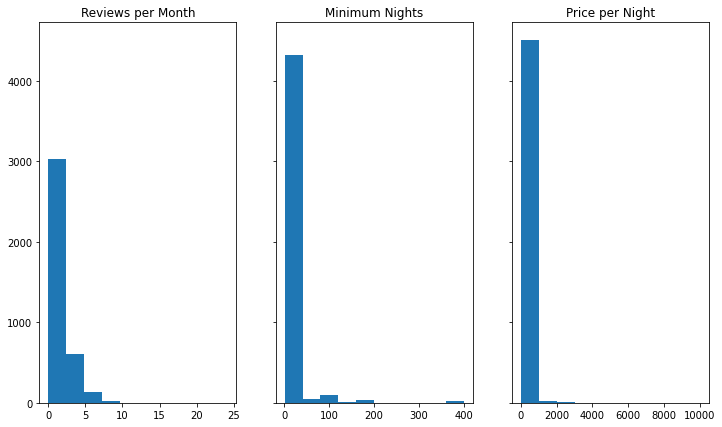

In [4]:
# Plot histograms of the relevant data

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(12,7))
ax = ax.ravel() 

ax[0].hist(df['reviews_per_month'])
title = 'Reviews per Month'
ax[0].set_title(title)
ax[1].hist(df['minimum_nights'])
title = 'Minimum Nights'
ax[1].set_title(title)
ax[2].hist(df['price'])
title = 'Price per Night'
ax[2].set_title(title)

# Create New Attributes

Monthly Income = 'Reviews per Month' x 'Min Nights' x 'Price'

Distance = Geographic distance from city center in KM

In [5]:
# Create monthly income attribute

monthly_income = df['reviews_per_month'] * df['minimum_nights'] * df['price']

df = pd.concat([df,monthly_income], axis=1)
df = df.rename(columns = {0 : 'monthly_income'})

In [6]:
# Create distance from center attribute
from geopy.distance import geodesic

distance = []

for i in range(df.shape[0]):
  row = df.iloc[i]
  coords_1 = (row['latitude'], row['longitude'])
  coords_2 = (49.28353, -123.1152)
  dist = geodesic(coords_1, coords_2).km
  distance.append(dist)

df['distance'] = distance

In [7]:
df.loc[:,['monthly_income','distance']]

,monthly_income,distance
0,1848.6,0.692537
1,531.0,4.048916
2,7879.5,0.852895
3,3195.0,4.691379
4,112.5,4.540411
...,...,...
4526,NaN,1.757226
4527,NaN,4.070351
4528,NaN,0.934051
4529,NaN,3.502928


# Remove NULL values

In [8]:
# since number_of_reviews == 0, replace null integer values with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Replace null date values with 'No Reviews'
df['last_review'] = df['last_review'].replace(np.nan, 'No Reviews')

# Drop null column
df = df.drop(axis=1, columns=['neighbourhood_group', 'license']) # remove license (uninterested for this analysis)

# Drop remaining null records
df = df.dropna(axis= 0)


df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
monthly_income                    0
distance                          0
dtype: int64

# Remove Outliers


In [9]:
#Remove outliers

outliers_price = df.index[df['price'] >= 2000]
df.drop(outliers_price, inplace=True)

outliers_nights = df.index[df['minimum_nights'] >= 200]
df.drop(outliers_nights, inplace=True)

outliers_monthly_income = df.index[df['monthly_income'] == 0]
df.drop(outliers_monthly_income, inplace=True)

df.shape

(3763, 18)

# Show monthly income distribution

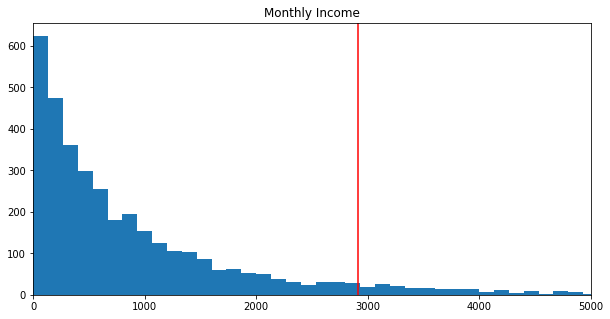

In [10]:
# Plot histogram of monthly income
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.hist(df['monthly_income'], bins=1000)
ax.set_title('Monthly Income')
ax.set_xlim([0, 5000])
ax.axvline(x=2915, color='r')



---


# Show monthly income by room type

In [11]:
# #Graph is created and stored in the variable 'graph'
# graph = sns.barplot(x="room_type",y="monthly_income",data=df)

# #Drawing a horizontal line at point 1.25
# graph.axhline(2915)

# #The plot is shown
# plt.show()

Text(3000, 200, 'Average Rent / Month')

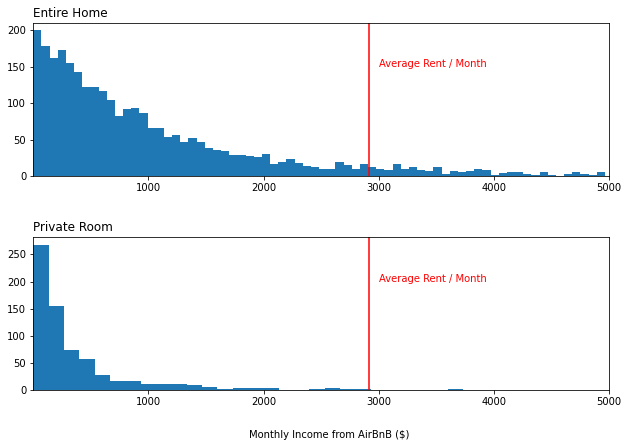

In [12]:
# Extract information by room type

entire_home = df.query('room_type == "Entire home/apt"')
private_room = df.query('room_type == "Private room"')

# Plot histograms by room type

fig, ax = plt.subplots(2, 1, figsize=(10,6))
plt.subplots_adjust(left=0.1,
                    bottom=0.15, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
fig.text(0.4, 0.04, s="Monthly Income from AirBnB ($)")
ax = ax.ravel() 

ax[0].hist(entire_home['monthly_income'], bins=1000)
ax[0].set_title('Entire Home', loc='left')
ax[0].set_xlim([1, 5000])
ax[0].axvline(x=2915, color='r')
ax[0].text(3000, 150, s="Average Rent / Month", color='r')
ax[1].hist(private_room['monthly_income'], bins=1000)
ax[1].set_title('Private Room', loc='left')
ax[1].set_xlim([1, 5000])
ax[1].axvline(x=2915, color='r')
ax[1].text(3000, 200, s="Average Rent / Month", color='r')



---


# Transform lognormal distribution of Monthly Income

In [13]:
# Scale lognormal distribution
entire_home["monthly_income_log"] = np.log(entire_home["monthly_income"])
private_room["monthly_income_log"] = np.log(private_room["monthly_income"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until




---


# Is Monthly Income Higher in City Center

In [14]:
# # Scatterplot showing monthly income by distance, color by neighbourhood

# sns.FacetGrid(entire_home, hue="neighbourhood", palette="husl", height=5) \
#    .map(plt.scatter, "distance", "monthly_income") \
#    .add_legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


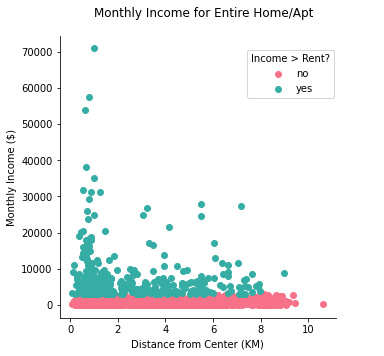

In [15]:
# Create attribute to identify monthly incomes > average rental costs ($2915)

entire_home['high_income'] = ""
index_yes = entire_home.index[entire_home['monthly_income'] >= 2915]
index_no = entire_home.index[entire_home['monthly_income'] < 2915]
for i in index_yes:
  entire_home.loc[i, 'high_income'] = 'yes'
for i in index_no:
  entire_home.loc[i, 'high_income'] = 'no'


# Show scatter plot of monthly income over distance, colour by new attribute

g1 = sns.FacetGrid(entire_home, hue="high_income", palette="husl", height=5)
g1.map(plt.scatter, "distance", "monthly_income")
g1.set_titles("Monthly Income for Entire Home/Apt")
g1.set_axis_labels(x_var="Distance from Center (KM)", y_var="Monthly Income ($)")
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle("Monthly Income for Entire Home/Apt")
g1.add_legend(title="Income > Rent?",loc="upper right", borderaxespad=5, frameon=True)

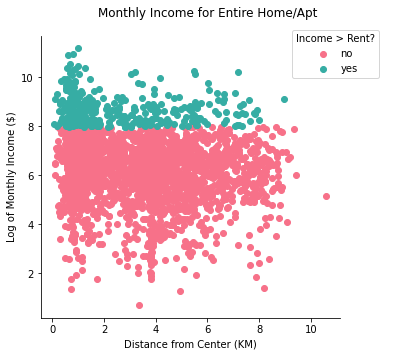

In [16]:
# Show scatter plot of monthly income over distance, colour by new attribute
p = sns.FacetGrid(entire_home, hue="high_income", palette="husl", height=5) \
       .map(plt.scatter, "distance", "monthly_income_log") \
       .set_titles("Monthly Income for Entire Home/Apt")
p.set_axis_labels(x_var="Distance from Center (KM)", \
                  y_var="Log of Monthly Income ($)")
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle("Monthly Income for Entire Home/Apt")
p.add_legend(title="Income > Rent?",loc="upper right", borderaxespad=3, frameon=True)



---


# Map of monthly income

In [31]:
print(entire_home['monthly_income'].mean())

1637.2017879486332


In [30]:
import plotly.express as px

fig = px.scatter_mapbox(entire_home, lat='latitude',lon='longitude', 
                        color='monthly_income', range_color=[0,10000],
                        color_continuous_scale=px.colors.diverging.RdYlBu_r, 
                        color_continuous_midpoint=2950, 
                        hover_name="monthly_income", 
                        zoom=9.9, center={'lat':49.25, 'lon':-123.15}, 
                        mapbox_style='carto-darkmatter')
fig.update_layout(title = 'AirBnB Vancouver (BC)', title_x=0.5)
fig.show()

Merge Data

In [18]:
#Adding a column 
df_merge = pd.merge(df, df_detailed[['review_scores_value', 'id']], how='inner')

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3763 entries, 0 to 3762
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3763 non-null   int64  
 1   name                            3763 non-null   object 
 2   host_id                         3763 non-null   int64  
 3   host_name                       3763 non-null   object 
 4   neighbourhood                   3763 non-null   object 
 5   latitude                        3763 non-null   float64
 6   longitude                       3763 non-null   float64
 7   room_type                       3763 non-null   object 
 8   price                           3763 non-null   int64  
 9   minimum_nights                  3763 non-null   int64  
 10  number_of_reviews               3763 non-null   int64  
 11  last_review                     3763 non-null   object 
 12  reviews_per_month               37

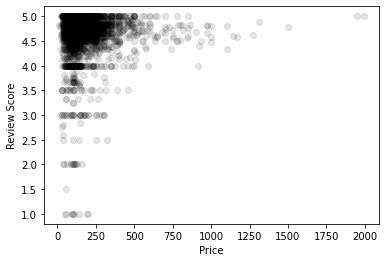

In [19]:
fig, ax = plt.subplots()

plt.scatter(df_merge['price'], df_merge['review_scores_value'], alpha=.1, color='black')
ax.set_xlabel('Price')
#ax.set_xlim(0, 500)
ax.set_ylabel('Review Score')
plt.show()

Text(0, 0.5, 'Review Score')

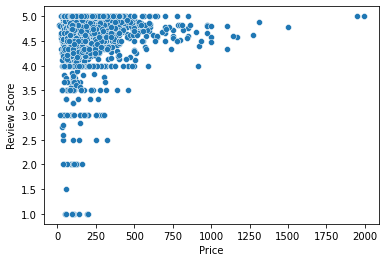

In [20]:
ax=sns.scatterplot(x=df_merge['price'], y=df_merge['review_scores_value'], )
ax.set_xlabel('Price')
ax.set_ylabel('Review Score')

[(0.0, 5.0)]

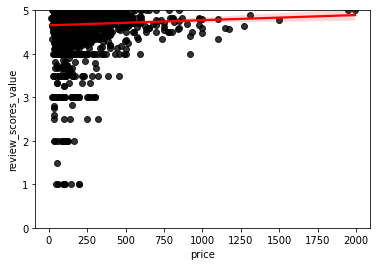

In [21]:
ax=sns.regplot(x='price',y='review_scores_value', 
              data=df_merge, color='black', line_kws={'color':'red'})
              # markers='x')
              # hue='price', 
              # palette='colorblind', legend=False)
ax.set(ylim=(0,5))

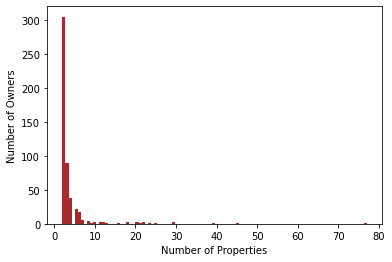

In [32]:
#Create a mask to select for all listings with multiple hosts that have multiple properties
df_multiplePropertiesMask = df['calculated_host_listings_count'] > 1

#Create dataframe that removes listings where the property owner owns no other properties
df_multipleProperties = df[df_multiplePropertiesMask]

#Remove the duplicates as we are interested in the frequency of owners
df_multipleProperties = df_multipleProperties.drop_duplicates(subset='host_id')

#Display info
#df_multipleProperties.info()

#Display Histogram
fig, ax = plt.subplots()
ax.hist(df_multipleProperties['calculated_host_listings_count'], bins=100, color='brown')
#ax.set_xlim(0, 60)
#ax.set_ylim(0, 350)
ax.set_xlabel('Number of Properties')
ax.set_ylabel('Number of Owners')
#ax.set_title("Frequency of Owners of Multiple Properties")
plt.show()

In [33]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat='latitude',lon='longitude', color='room_type', range_color=[0,5], 
                        hover_name="price", zoom=9.9, center={'lat':49.25, 'lon':-123.15}, mapbox_style="stamen-watercolor")
fig.update_layout(title = 'Air BnB Vancouver by Room Type', title_x=0.5)
fig.show()